# eCommerce Dataset Summary & Word2vec

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

% matplotlib inline
plt.style.use('fivethirtyeight')

In [219]:
reviews = pd.read_csv('../data/ecommerce_reviews.csv', index_col=0)

In [220]:
reviews.shape

(23486, 10)

## Data exploration and visualization

In [221]:
reviews.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

**Columns**

- id

- clothing/product id 

- age of reviewer

- title of review

- review text

- rating

- recommended by reviewer (0, 1)

- positive feedback count

- division name

- department name

- class name

### Number of items in data

In [222]:
print('There are', len(reviews.index), 'reviews in this dataset.')

There are 23486 reviews in this dataset.


In [223]:
print('There are', len(reviews['Clothing ID'].unique()), 'unique pieces of clothing.')

There are 1206 unique pieces of clothing.


## Ratings & Recommedations

### Distribution of Ratings

In [224]:
rating_values = reviews['Rating'].value_counts()

Text(0,0.5,'Number given')

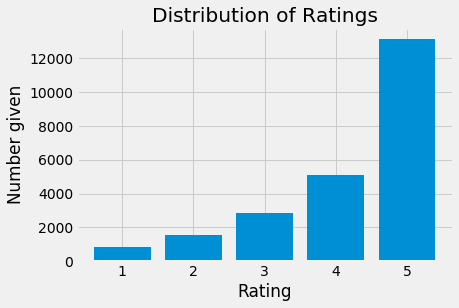

In [225]:
rating_values = plt.bar(rating_values.index, rating_values)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number given')

### Distribution of recommendations

In [226]:
recommendation_values = reviews['Recommended IND'].value_counts()

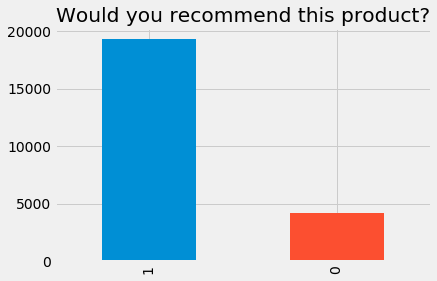

In [227]:
recommendation_values.plot.bar()
plt.title('Would you recommend this product?')
plt.show()

### How are ratings and recommendations connected?

In [228]:
grouped_ratings = reviews.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count()
grouped_ratings = pd.DataFrame(grouped_ratings)
grouped_ratings.rename(index = str, columns = {'Recommended IND': 'Counts'})

Counts
Rating Recommended IND        
1      0                   826
       1                    16
2      0                  1471
       1                    94
3      0                  1682
       1                  1189
4      0                   168
       1                  4909
5      0                    25
       1                 13106

In [229]:
print('The correlation between ratings and recommendations: is', 
      reviews['Rating'].corr(reviews['Recommended IND']))

The correlation between ratings and recommendations: is 0.792336287928579


## People

### Distribution of Ages

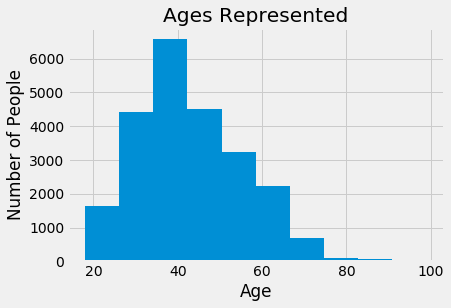

In [230]:
plt.hist(reviews['Age'])
plt.title('Ages Represented')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

### Distribution of Positive Feedback Given

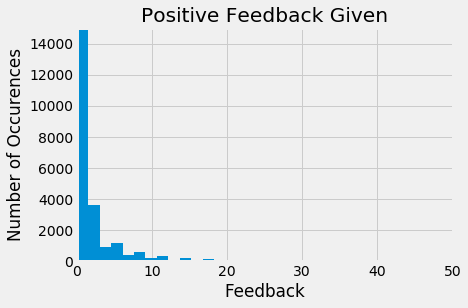

In [231]:
fig, ax = plt.subplots(1,1)
ax.set_xlim(0, 50)
ax.set_ylim(0, 15000)
plt.hist(reviews['Positive Feedback Count'], bins=80)
plt.title('Positive Feedback Given')
plt.xlabel('Feedback')
plt.ylabel('Number of Occurences')
plt.show()

In [232]:
reviews['Positive Feedback Count'].value_counts().sort_values(ascending = False).head()
#most common counts of positive feedback

0    11176
1     4043
2     2193
3     1433
4      922
Name: Positive Feedback Count, dtype: int64

In [233]:
reviews['Positive Feedback Count'].value_counts().sort_values(ascending = True).head()
#least common counts of positive feedback 

95    1
66    1
50    1
64    1
94    1
Name: Positive Feedback Count, dtype: int64

### Positive feedback count relevant to rating given

In [234]:
grouped_ratings = reviews.groupby(['Rating', 'Positive Feedback Count'])['Positive Feedback Count'].count()

In [235]:
grouped_ratings = grouped_ratings.to_frame()

In [236]:
grouped_ratings.rename(index=str, columns={"Positive Feedback Count": "Number of Instances"}, inplace = True)

In [237]:
grouped_ratings.head()

Number of Instances
Rating Positive Feedback Count                     
1      0                                        343
       1                                        131
       2                                         81
       3                                         59
       4                                         37

## Trends between text length and rating/recommendation

In [238]:
reviews['Review Text'] = reviews['Review Text'].astype(str)

In [239]:
reviews['Text Length'] = reviews['Review Text'].apply(len)

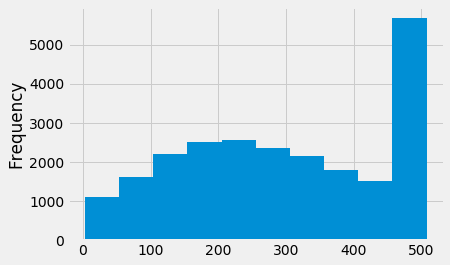

In [240]:
#looking at the text lengths of all the reviews

reviews['Text Length'].plot('hist')

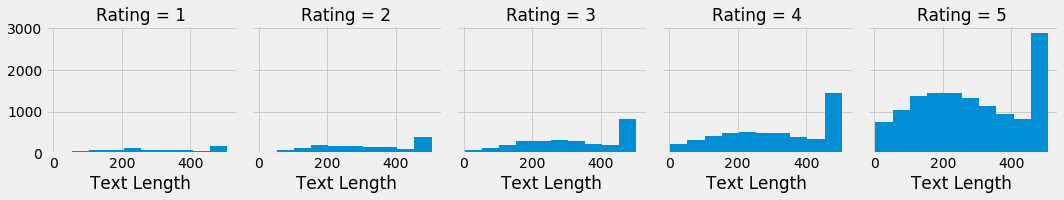

In [241]:
#text lengths by rating

grid = sns.FacetGrid(data=reviews, col='Rating')
grid.map(plt.hist, 'Text Length')

In [242]:
rating_1 = reviews[reviews['Rating'] == 1].sample(500)
rating_2 = reviews[reviews['Rating'] == 2].sample(500)
rating_3 = reviews[reviews['Rating'] == 3].sample(500)
rating_4 = reviews[reviews['Rating'] == 4].sample(500)
rating_5 = reviews[reviews['Rating'] == 5].sample(500)

In [243]:
#data frame with even representations of each rating

splits = [rating_1, rating_2, rating_3, rating_4, rating_5]
even_ratings = pd.concat(splits)

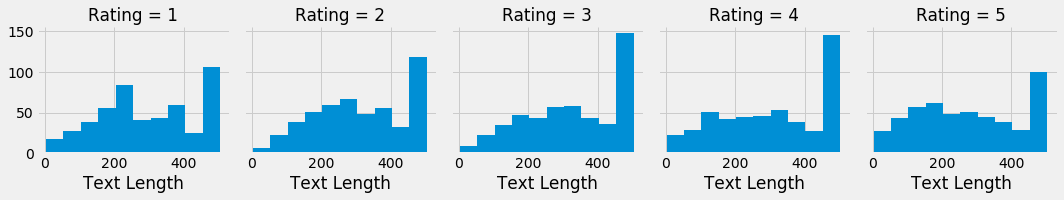

In [244]:
#text lengths by rating, using the df with the even representations

grid2 = sns.FacetGrid(data=even_ratings, col='Rating')
grid2.map(plt.hist, 'Text Length')

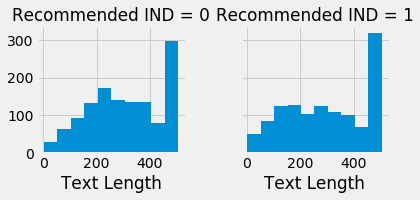

In [245]:
#text lengths by rating, using the df with the even representations
#showing by if they'd recommend the product

grid3 = sns.FacetGrid(data=even_ratings, col='Recommended IND')
grid3.map(plt.hist, 'Text Length')

In [246]:
reviews['Rating'].corr(reviews['Text Length'])

-0.07317614554434589

In [247]:
reviews['Recommended IND'].corr(reviews['Text Length'])

-0.046605083239740074

## Cleaning data

In [250]:
import bs4
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords

In [251]:
#make a function do this cleaning for all 25k reviews
#input is a single string (raw movie review)
#output is a single string (preprocessed movie review)

def review_to_words(raw_review):
    letters_only = re.sub("[^a-z^A-Z]", " ", raw_review)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english')) 
    meaningful_words = [w for w in words if not w in stops]
    return(" ".join(meaningful_words))

In [252]:
reviews['Review Text'] = reviews['Review Text'].apply(str)

In [253]:
review_to_words(reviews.loc[0, 'Review Text'])

'absolutely wonderful silky sexy comfortable'

In [254]:
cleaned = []

for review in reviews['Review Text']:
    cleaned.append(review_to_words(review))

In [255]:
cleaned[0:5]

['absolutely wonderful silky sexy comfortable',
 'love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments',
 'love tracy reese dresses one petite feet tall usually wear p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alterations shortening narrowing skirt would take away embellishment garment love color idea style work returned dress',
 'ordered carbon store pick ton stuff always try used top pair skirts pants everything went color really nice charcoal shimmer went well pencil skirts flare pants etc compaint bit big sleeves long go petite also bit loose xxs kept wil ldecide later since light color already sold hte smallest size']

## Vectorizer!

### CountVectorizer

In [256]:
from sklearn.feature_extraction.text import CountVectorizer

In [257]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None,
                            preprocessor = None, stop_words = None, 
                            max_features = 5000)

train_data_features = vectorizer.fit_transform(cleaned)
train_data_features = train_data_features.toarray()

In [258]:
train_data_features.shape

(16441, 5000)

In [259]:
#exploring most common words in vectorizer

vocab = vectorizer.get_feature_names()
dist = np.sum(train_data_features, axis = 0)

In [260]:
word_counts = pd.DataFrame(np.array(vocab), columns = ['Word'])
word_counts['Count'] = dist
word_counts.set_index('Word', inplace=True)

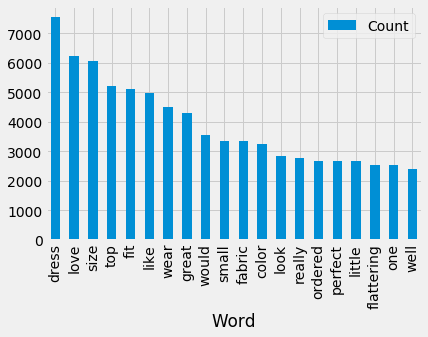

In [261]:
#most common words
word_counts.sort_values(by='Count', ascending = False).head(20).plot.bar()

In [262]:
print ('Shape of Sparse Matrix: ', train_data_features.shape)
print ('Amount of Non-Zero occurences: ', len(train_data_features.nonzero()[0]))

Shape of Sparse Matrix:  (16441, 5000)
Amount of Non-Zero occurences:  400956


## Using pipeline to test classification algorithms

In [310]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [309]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=review_to_words)),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(random_state=101))
])
pipeline.steps

[('bow', CountVectorizer(analyzer=<function review_to_words at 0x1a81b0d730>,
          binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
          encoding='utf-8', input='content', lowercase=True, max_df=1.0,
          max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
          stop_words=None, strip_accents=None,
          token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)),
 ('tfidf',
  TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
 ('clf',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))]

In [308]:
clfs = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3), DecisionTreeClassifier(), 
       RandomForestClassifier()]

In [313]:
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('-------')
    print(str(classifier))
    print('-------')
    for key, values in scores.items(): 
        print(key, ' mean ', values.mean())

-------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
-------
fit_time  mean  1.6619642575581868
score_time  mean  0.7876678307851156
test_score  mean  0.8239672892089094
train_score  mean  0.8238311694220753
-------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
-------
fit_time  mean  1.6065646807352703
score_time  mean  2.389710028966268
test_score  mean  0.7940084372726943
train_score  mean  0.8697231604083666
-------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_sp

In [316]:
# Logistic Regession is highest

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=review_to_words)),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(random_state=101))
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

In [317]:
print(confusion_matrix(y_test, predictions))

[[  15  946]
 [  19 4446]]


In [318]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.44      0.02      0.03       961
          1       0.82      1.00      0.90      4465

avg / total       0.76      0.82      0.75      5426

